# Chapter 20 - LSTMs

## Listing 20-1.Importing the weather data

In [1]:
import keras
import pandas as pd

from zipfile import ZipFile
import os

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)
del zip_file


# retain only temperature
df = df[['T (degC)']]

# apply a min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = ['T'])

# convert to windowed data sets
ylist = list(df['T'])

n_future = 72
n_past = 3*72
total_period = 4*72

idx_end = len(ylist)
idx_start = idx_end - total_period

X_new = []
y_new = []
while idx_start > 0:
  x_line = ylist[idx_start:idx_start+n_past]
  y_line = ylist[idx_start+n_past:idx_start+total_period]

  X_new.append(x_line)
  y_new.append(y_line)

  idx_start = idx_start - 1

import numpy as np
X_new = np.array(X_new)
y_new = np.array(y_new)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=42)

# reshape data into the right format for RNNs
n_samples = X_train.shape[0]
n_timesteps = X_train.shape[1]
n_steps = y_train.shape[1]
n_features = 1

X_train_rs = X_train.reshape(n_samples, n_timesteps, n_features )
X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features )



## Listing 20-2.One-layer LSTM

2025/05/27 18:45:23 WARNING mlflow.utils.autologging_utils: MLflow keras autologging is known to be compatible with 3.0.2 <= keras <= 3.9.2, but the installed version is 3.10.0. If you encounter errors during autologging, try upgrading / downgrading keras to a compatible version, or try upgrading MLflow.
2025/05/27 18:45:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/05/27 18:45:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/05/27 18:45:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
/opt/anaconda3/envs/chapter18-20/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 8)              │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 72)             │           648 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 968 (3.78 KB)

 Trainable params: 968 (3.78 KB)

 Non-trainable params: 0 (0.00 B)

2025/05/27 18:45:23 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ea0e4eb6858e4aa081918ca48df4e46a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/5
7038/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0450 - mean_absolute_error: 0.0450  

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 118s 17ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - val_loss: 0.0278 - val_mean_absolute_error: 0.0278
Epoch 2/5
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 119s 17ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282
Epoch 3/5
7037/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0274 - mean_absolute_error: 0.0274  

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 120s 17ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - val_loss: 0.0264 - val_mean_absolute_error: 0.0264
Epoch 4/5
7039/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0269 - mean_absolute_error: 0.0269  

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 120s 17ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - val_loss: 0.0262 - val_mean_absolute_error: 0.0262
Epoch 5/5
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 121s 17ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - val_loss: 0.0263 - val_mean_absolute_error: 0.0263
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
4334/4334 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step
0.9271020346460817


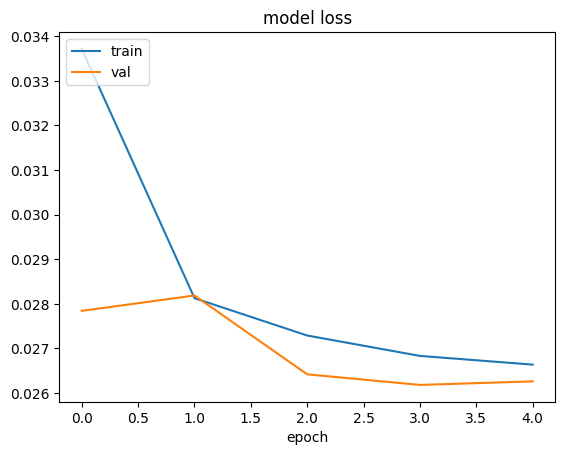

In [4]:
import random
random.seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

import mlflow
mlflow.autolog()

batch_size = 32
simple_model = Sequential([
   LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)

print(r2_score(preds, y_test))

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


## Listing 20-3.Three-layer LSTM

/opt/anaconda3/envs/chapter18-20/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 216, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 216, 64)        │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 72)             │         4,680 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,624 (342.28 KB)

 Trainable params: 87,624 (342.28 KB)

 Non-trainable params: 0 (0.00 B)

2025/05/27 18:55:45 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7be464f4b0664200972682eb814adf35', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0446 - mean_absolute_error: 0.0446   

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 1053s 149ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - val_loss: 0.0273 - val_mean_absolute_error: 0.0273
Epoch 2/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - loss: 0.0275 - mean_absolute_error: 0.0275   

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 1686s 239ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - val_loss: 0.0268 - val_mean_absolute_error: 0.0268
Epoch 3/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 0.0266 - mean_absolute_error: 0.0266   

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 1159s 165ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - val_loss: 0.0260 - val_mean_absolute_error: 0.0260
Epoch 4/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.0257 - mean_absolute_error: 0.0257   

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 1101s 156ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - val_loss: 0.0247 - val_mean_absolute_error: 0.0247
Epoch 5/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 1283s 182ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - val_loss: 0.0248 - val_mean_absolute_error: 0.0248
Epoch 6/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.0247 - mean_absolute_error: 0.0247   

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 1035s 147ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - val_loss: 0.0237 - val_mean_absolute_error: 0.0237
Epoch 7/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 1131s 161ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - val_loss: 0.0240 - val_mean_absolute_error: 0.0240
Epoch 8/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.0240 - mean_absolute_error: 0.0240   

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 1003s 142ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - val_loss: 0.0231 - val_mean_absolute_error: 0.0231
Epoch 9/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 964s 137ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - val_loss: 0.0236 - val_mean_absolute_error: 0.0236
Epoch 10/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.0234 - mean_absolute_error: 0.0234   

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 929s 132ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - val_loss: 0.0228 - val_mean_absolute_error: 0.0228
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
4334/4334 ━━━━━━━━━━━━━━━━━━━━ 143s 33ms/step
0.9410477506080781


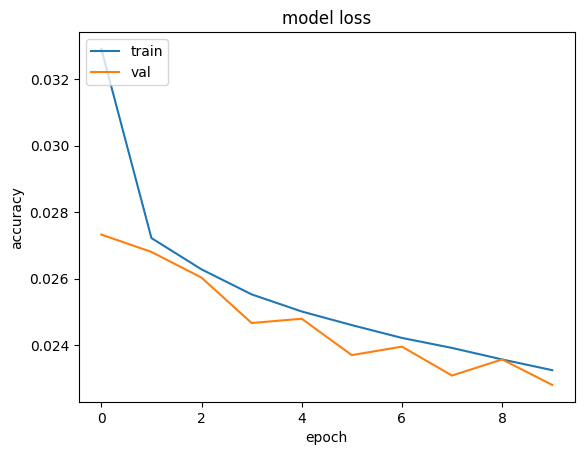

In [5]:
random.seed(42)

simple_model = Sequential([
   LSTM(64, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    LSTM(64, activation='tanh', return_sequences=True),
    LSTM(64, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)

print(r2_score(preds, y_test))

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
